## Data Preparation and Preprocessing

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, \
     recall_score, precision_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import pickle

In [36]:
data_0 = pd.read_excel("Crop_recommendation.xlsx")

In [37]:
data = data_0.copy()

In [4]:
data.head(15)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,0,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,0.000000,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [5]:
data.describe()

,rainfall
count,2200.000000
mean,102.961693
std,55.109932
min,0.000000
25%,64.236408
50%,94.651497
75%,123.026982
max,298.560117


In [6]:
data.dtypes

N               object
P               object
K               object
temperature     object
humidity        object
ph              object
rainfall       float64
label           object
dtype: object

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   object 
 1   P            2200 non-null   object 
 2   K            2194 non-null   object 
 3   temperature  2200 non-null   object 
 4   humidity     2200 non-null   object 
 5   ph           2186 non-null   object 
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(1), object(7)
memory usage: 137.6+ KB


In [15]:
print([x for x in data.N if type(x) != int])

[' ?', ' ?', ' ?', '?', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '? ', '?', ' ?', ' ?', ' ?', ' ?', '?', '?', ' ?', '? ', '? ', '? ', ' ?', ' ?', ' ?']


We see that alot of values as non numeric and contains '?' instead of null. So we replace the ? with null values.

In [38]:
data.replace("?",np.nan,inplace=True)

In [39]:
data.replace(" ?",np.nan,inplace=True)

In [40]:
data.replace("? ",np.nan,inplace=True)

In [20]:
data.isnull().sum()

N               39
P               96
K              141
temperature      1
humidity         1
ph              15
rainfall         0
label            0
dtype: int64

In [21]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2161.000000,2104.000000,2059.000000,2199.000000,2199.000000,2185.000000,2200.000000
mean,50.366960,53.672053,49.055367,25.619664,71.254084,6.470420,102.961693
std,37.173779,33.475591,52.020468,5.062358,22.614824,0.774668,55.109932
min,0.000000,0.000000,0.000000,8.825675,0.000000,3.504752,0.000000
25%,21.000000,28.000000,21.000000,22.770560,60.124723,5.972715,64.236408
50%,37.000000,52.000000,32.000000,25.600337,80.457444,6.425420,94.651497
75%,85.000000,68.000000,50.000000,28.561810,89.935793,6.924042,123.026982
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [22]:
data.describe(include="O")

,label
count,2200
unique,22
top,rice
freq,100


In [41]:
(data['N'] == 0).sum()

42

Some the columns contain 0 which doesn't make sense here. For example there is always some Nitroten amount and hence it can't be 0.

In [46]:
data['N'].replace(0, data.loc[data['N'] != 0, 'N'].mean(), inplace=True)
data['P'].replace(0, data.loc[data['P'] != 0, 'P'].mean(), inplace=True)
data['K'].replace(0, data.loc[data['K'] != 0, 'K'].mean(), inplace=True)
data['temperature'].replace(0, data.loc[data['temperature'] != 0, 'temperature'].mean(), inplace=True)
data['humidity'].replace(0, data.loc[data['humidity'] != 0, 'humidity'].mean(), inplace=True)
data['ph'].replace(0, data.loc[data['ph'] != 0, 'ph'].mean(), inplace=True)

In [47]:
data.fillna(data['N'].mean(),inplace=True)
data.fillna(data['P'].mean(),inplace=True)
data.fillna(data['K'].mean(),inplace=True)
data.fillna(data['temperature'].mean(),inplace=True)
data.fillna(data['humidity'].mean(),inplace=True)
data.fillna(data['ph'].mean(),inplace=True)

In [48]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [51]:
plt.rcParams['font.size'] = '16'

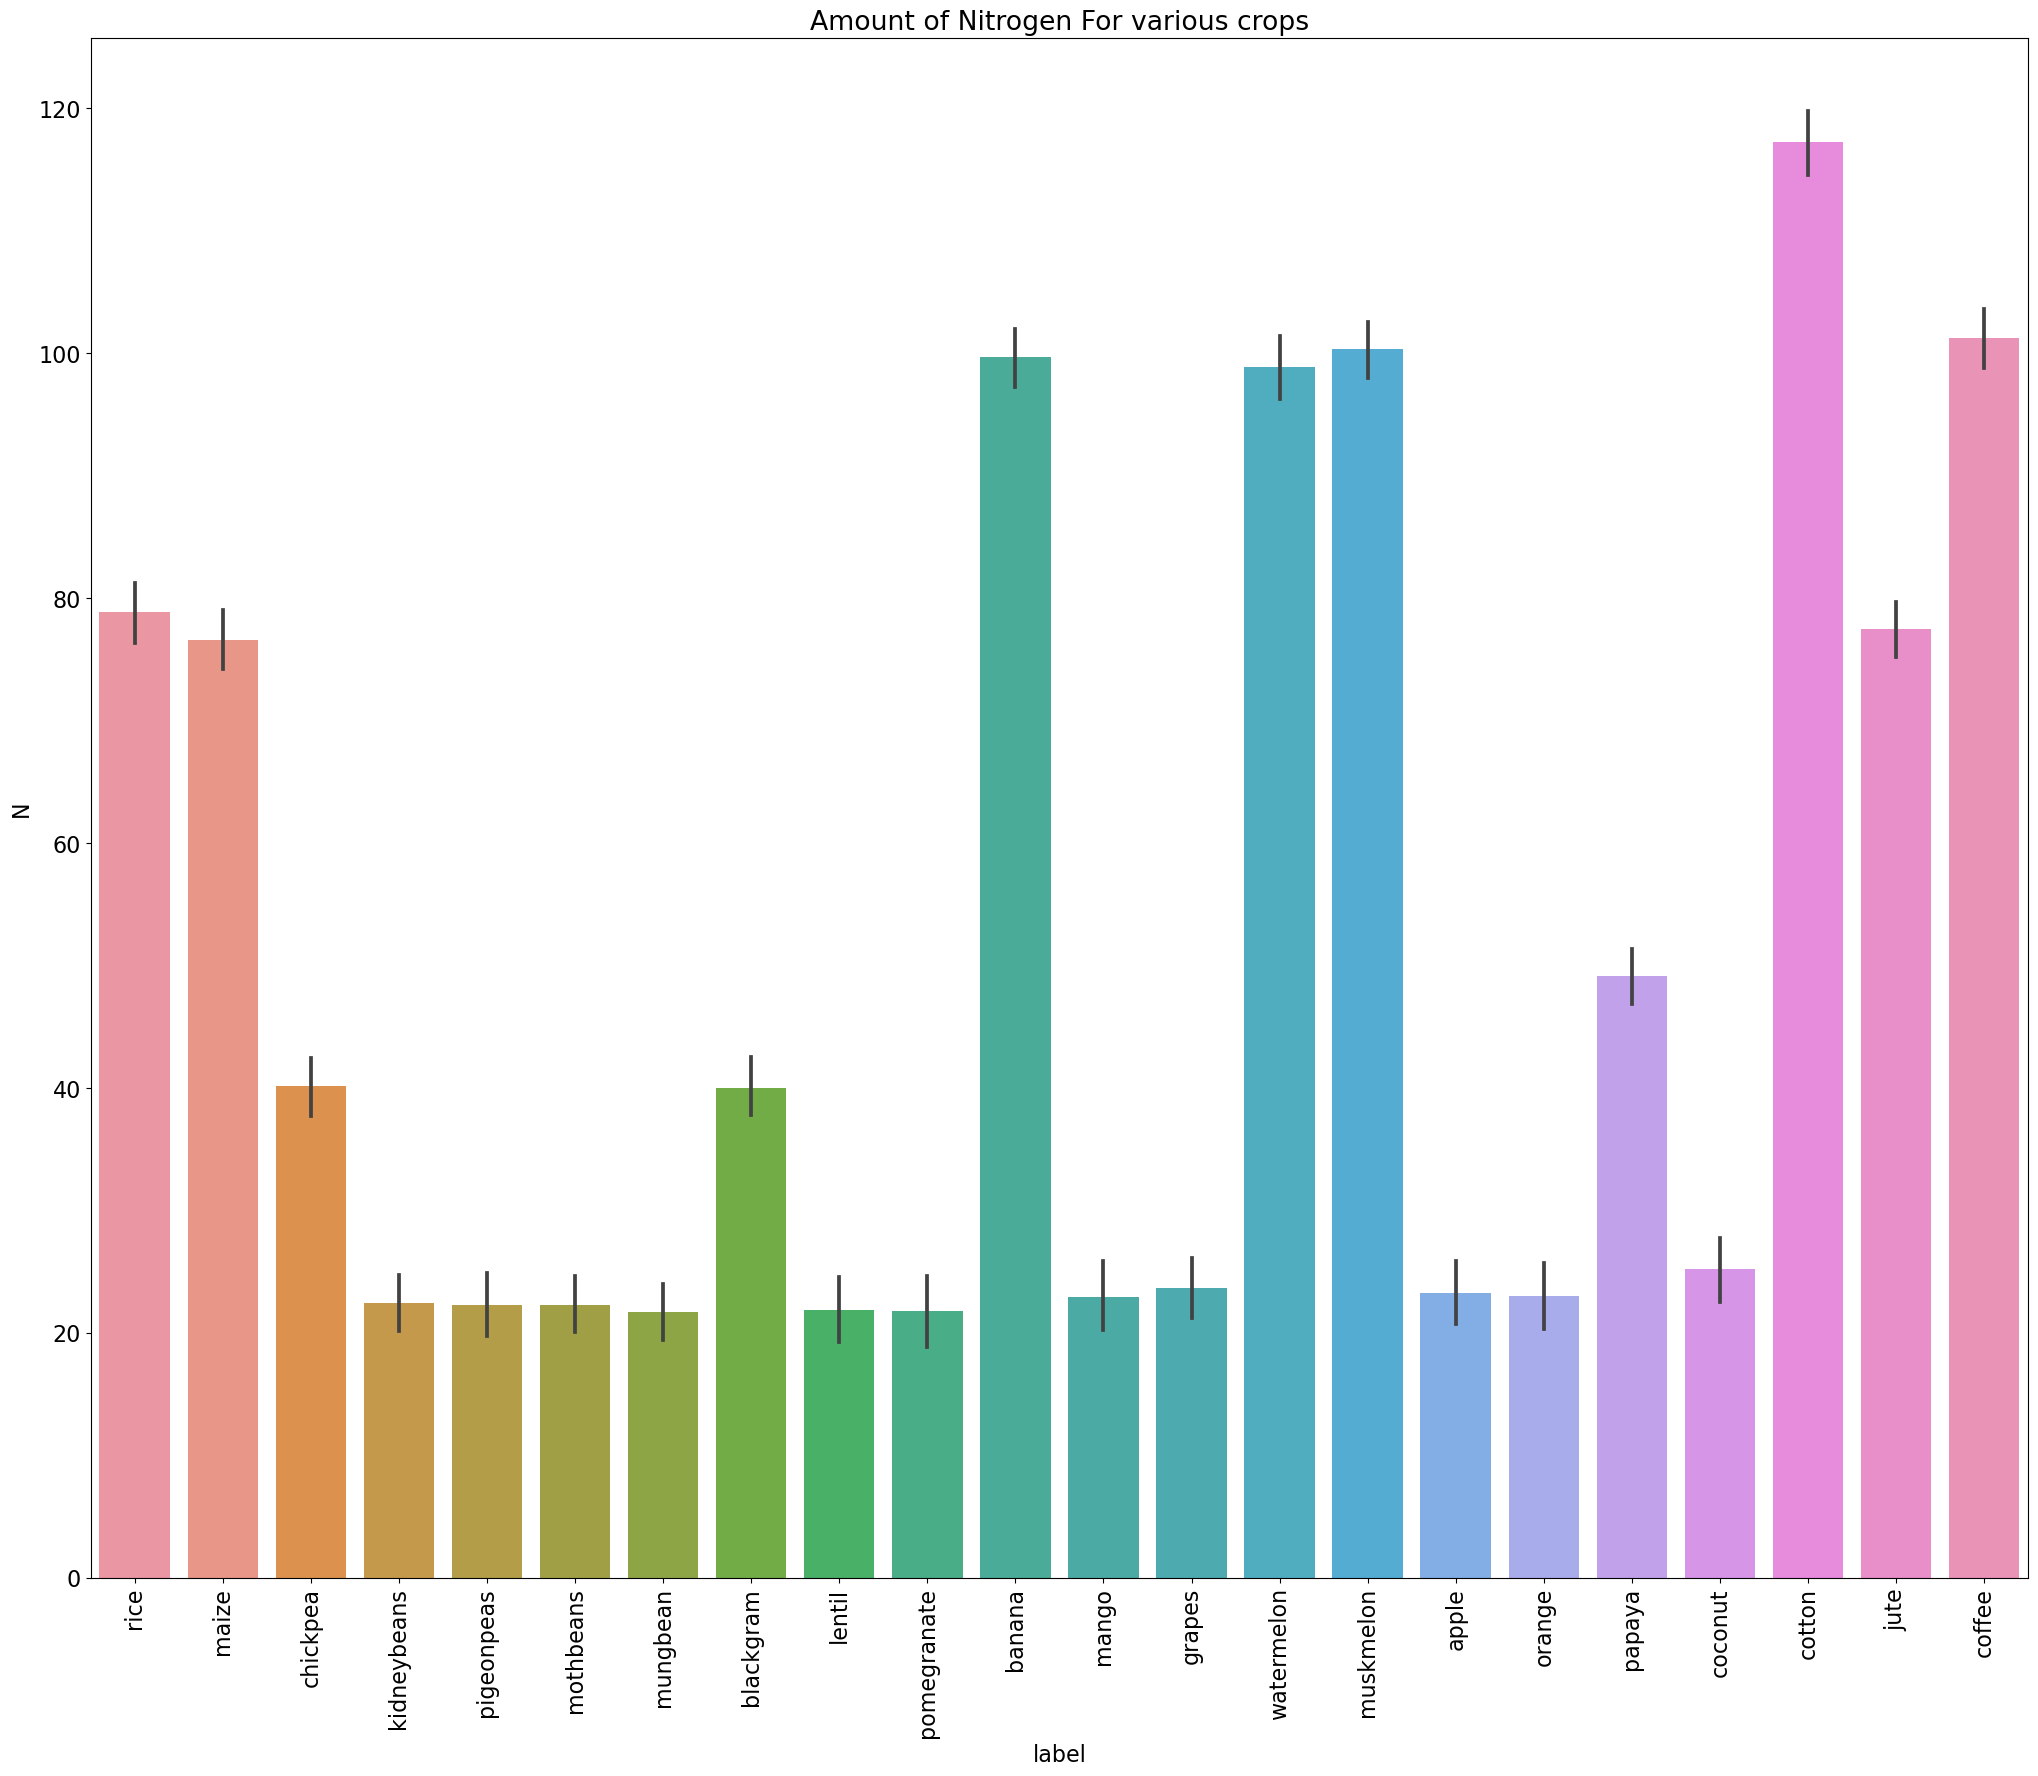

In [53]:
plt.figure(figsize=(25,20))
sns.barplot(x="label",y="N",data=data)
plt.xticks(rotation=90)
plt.title('Amount of Nitrogen For various crops');

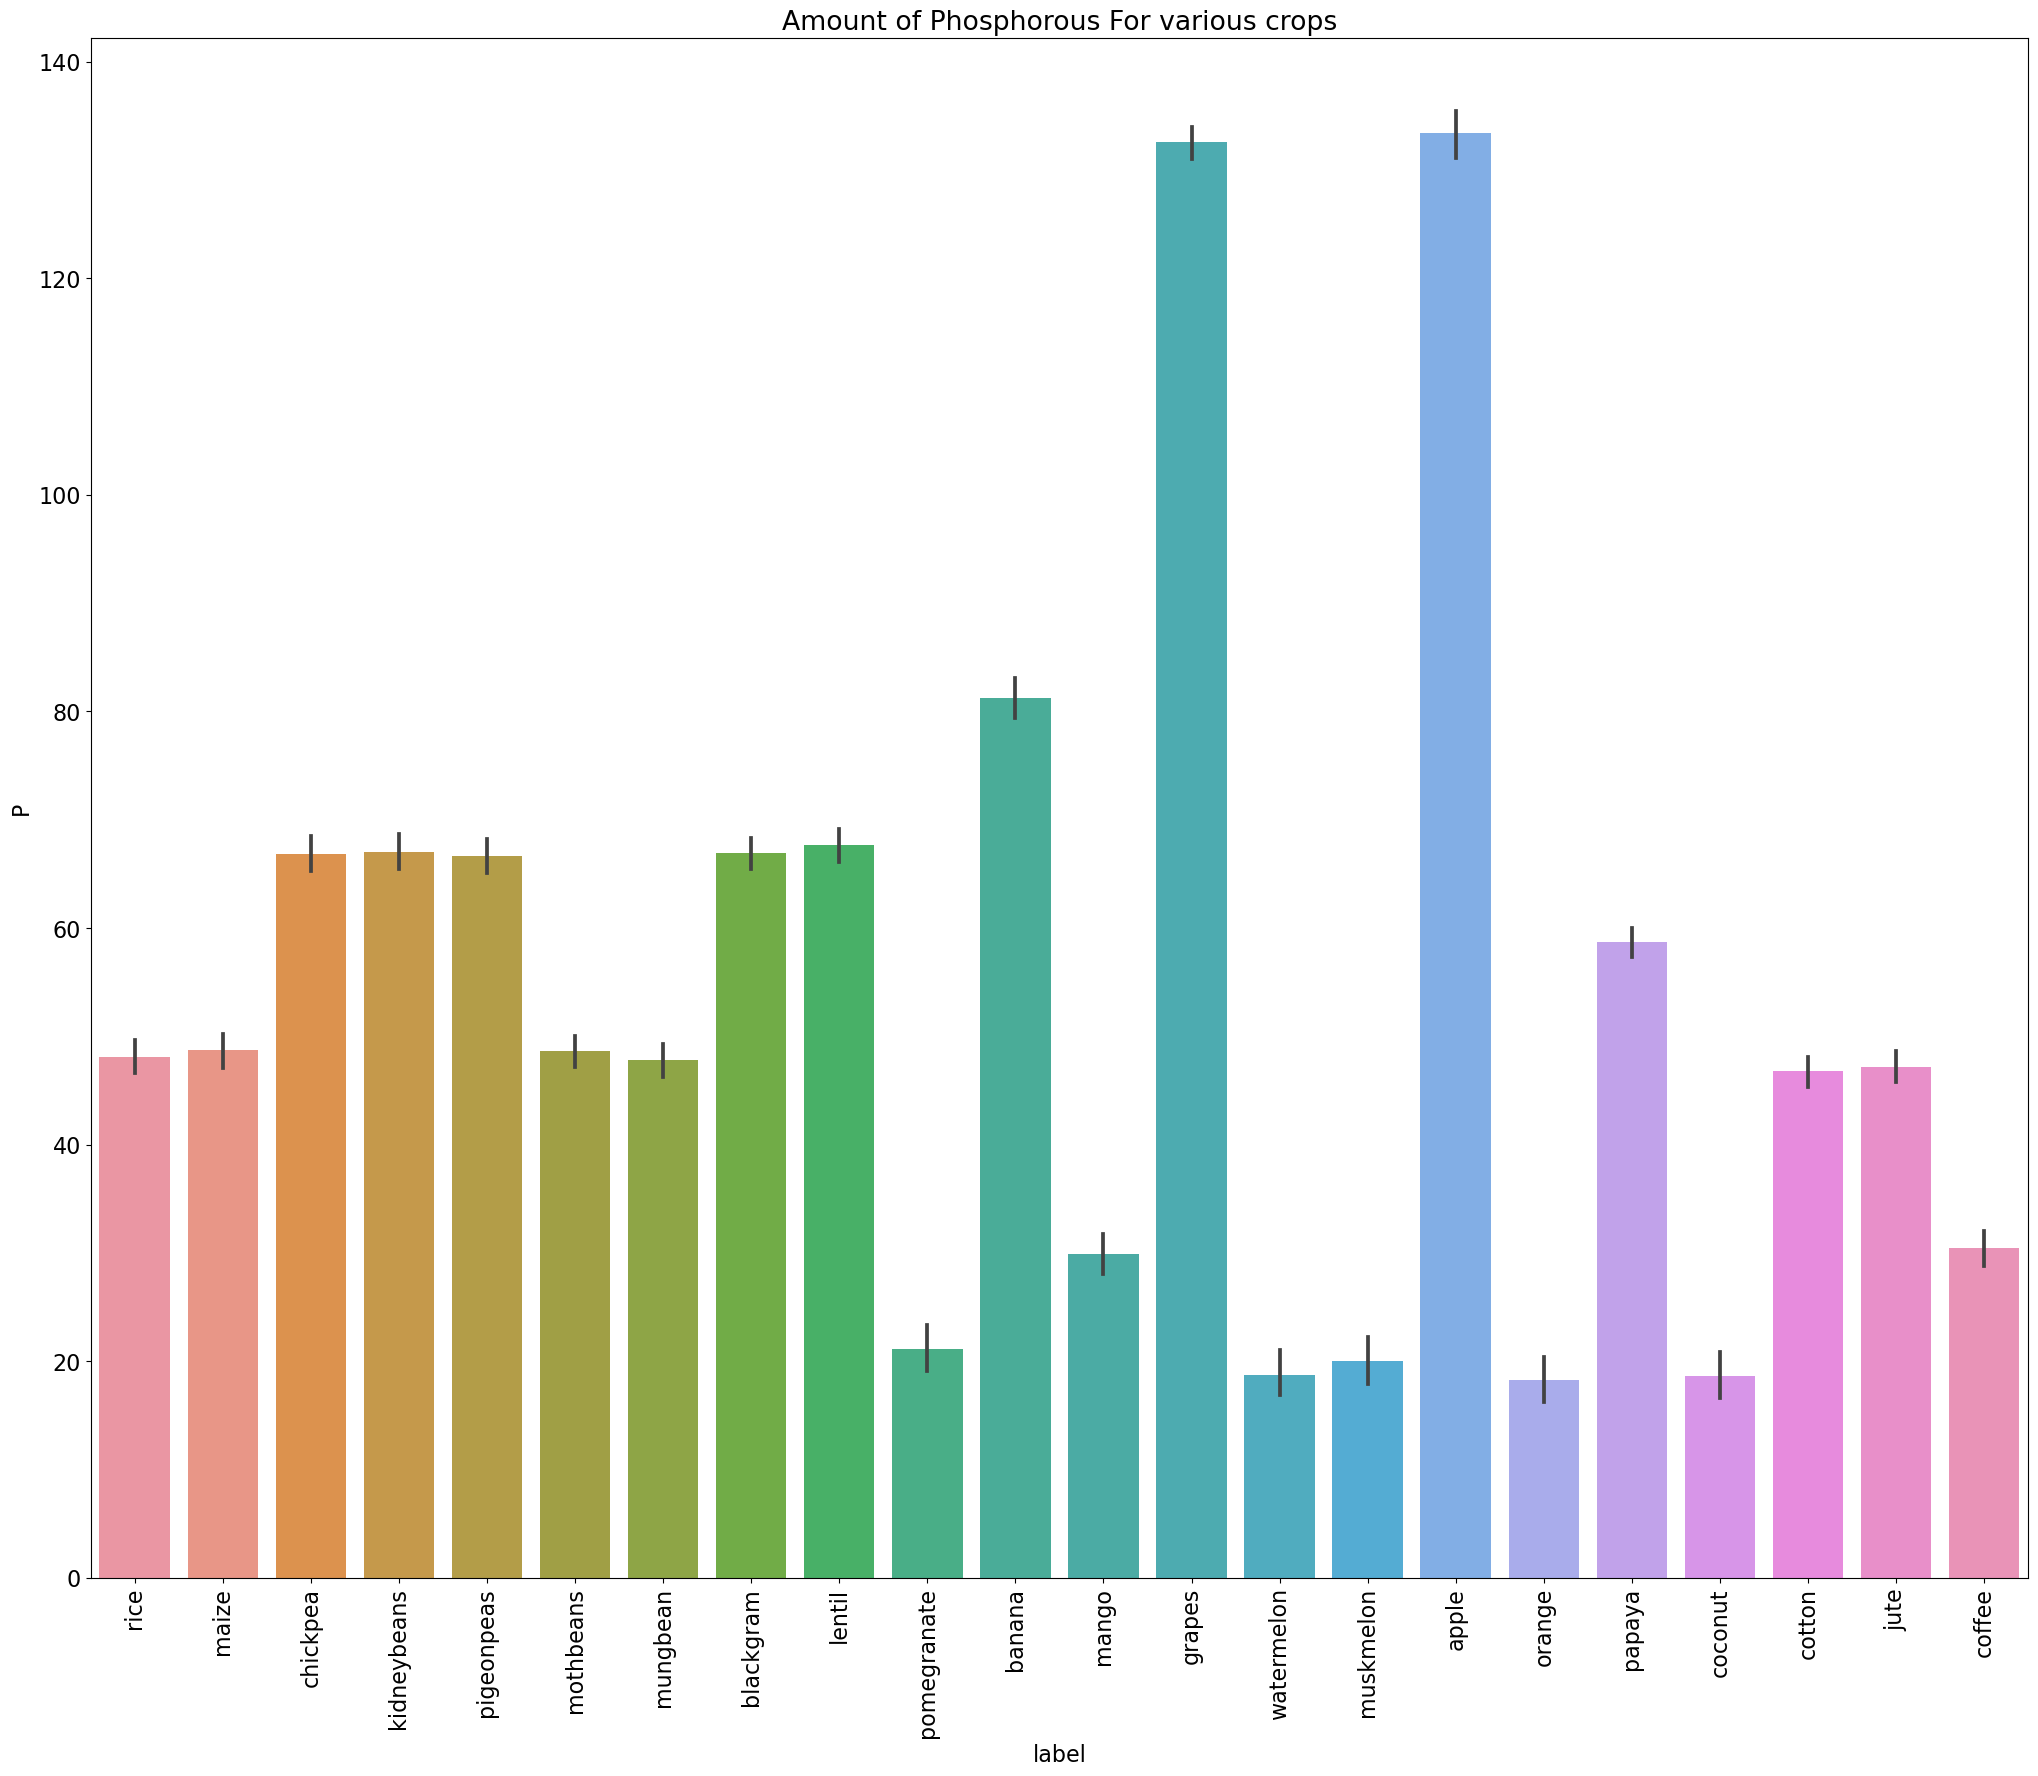

In [54]:
plt.figure(figsize=(25,20))
sns.barplot(x="label",y="P",data=data)
plt.xticks(rotation=90)
plt.title('Amount of Phosphorous For various crops');

In [55]:
plt.rcParams['font.size'] = '10'

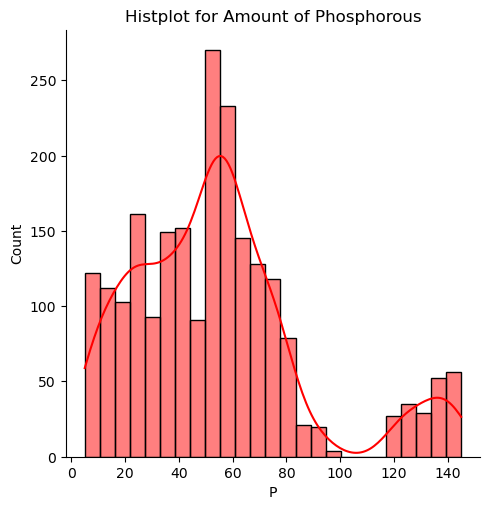

In [57]:
sns.displot(data["P"],color='r',kde=True)
plt.title('Histplot for Amount of Phosphorous');

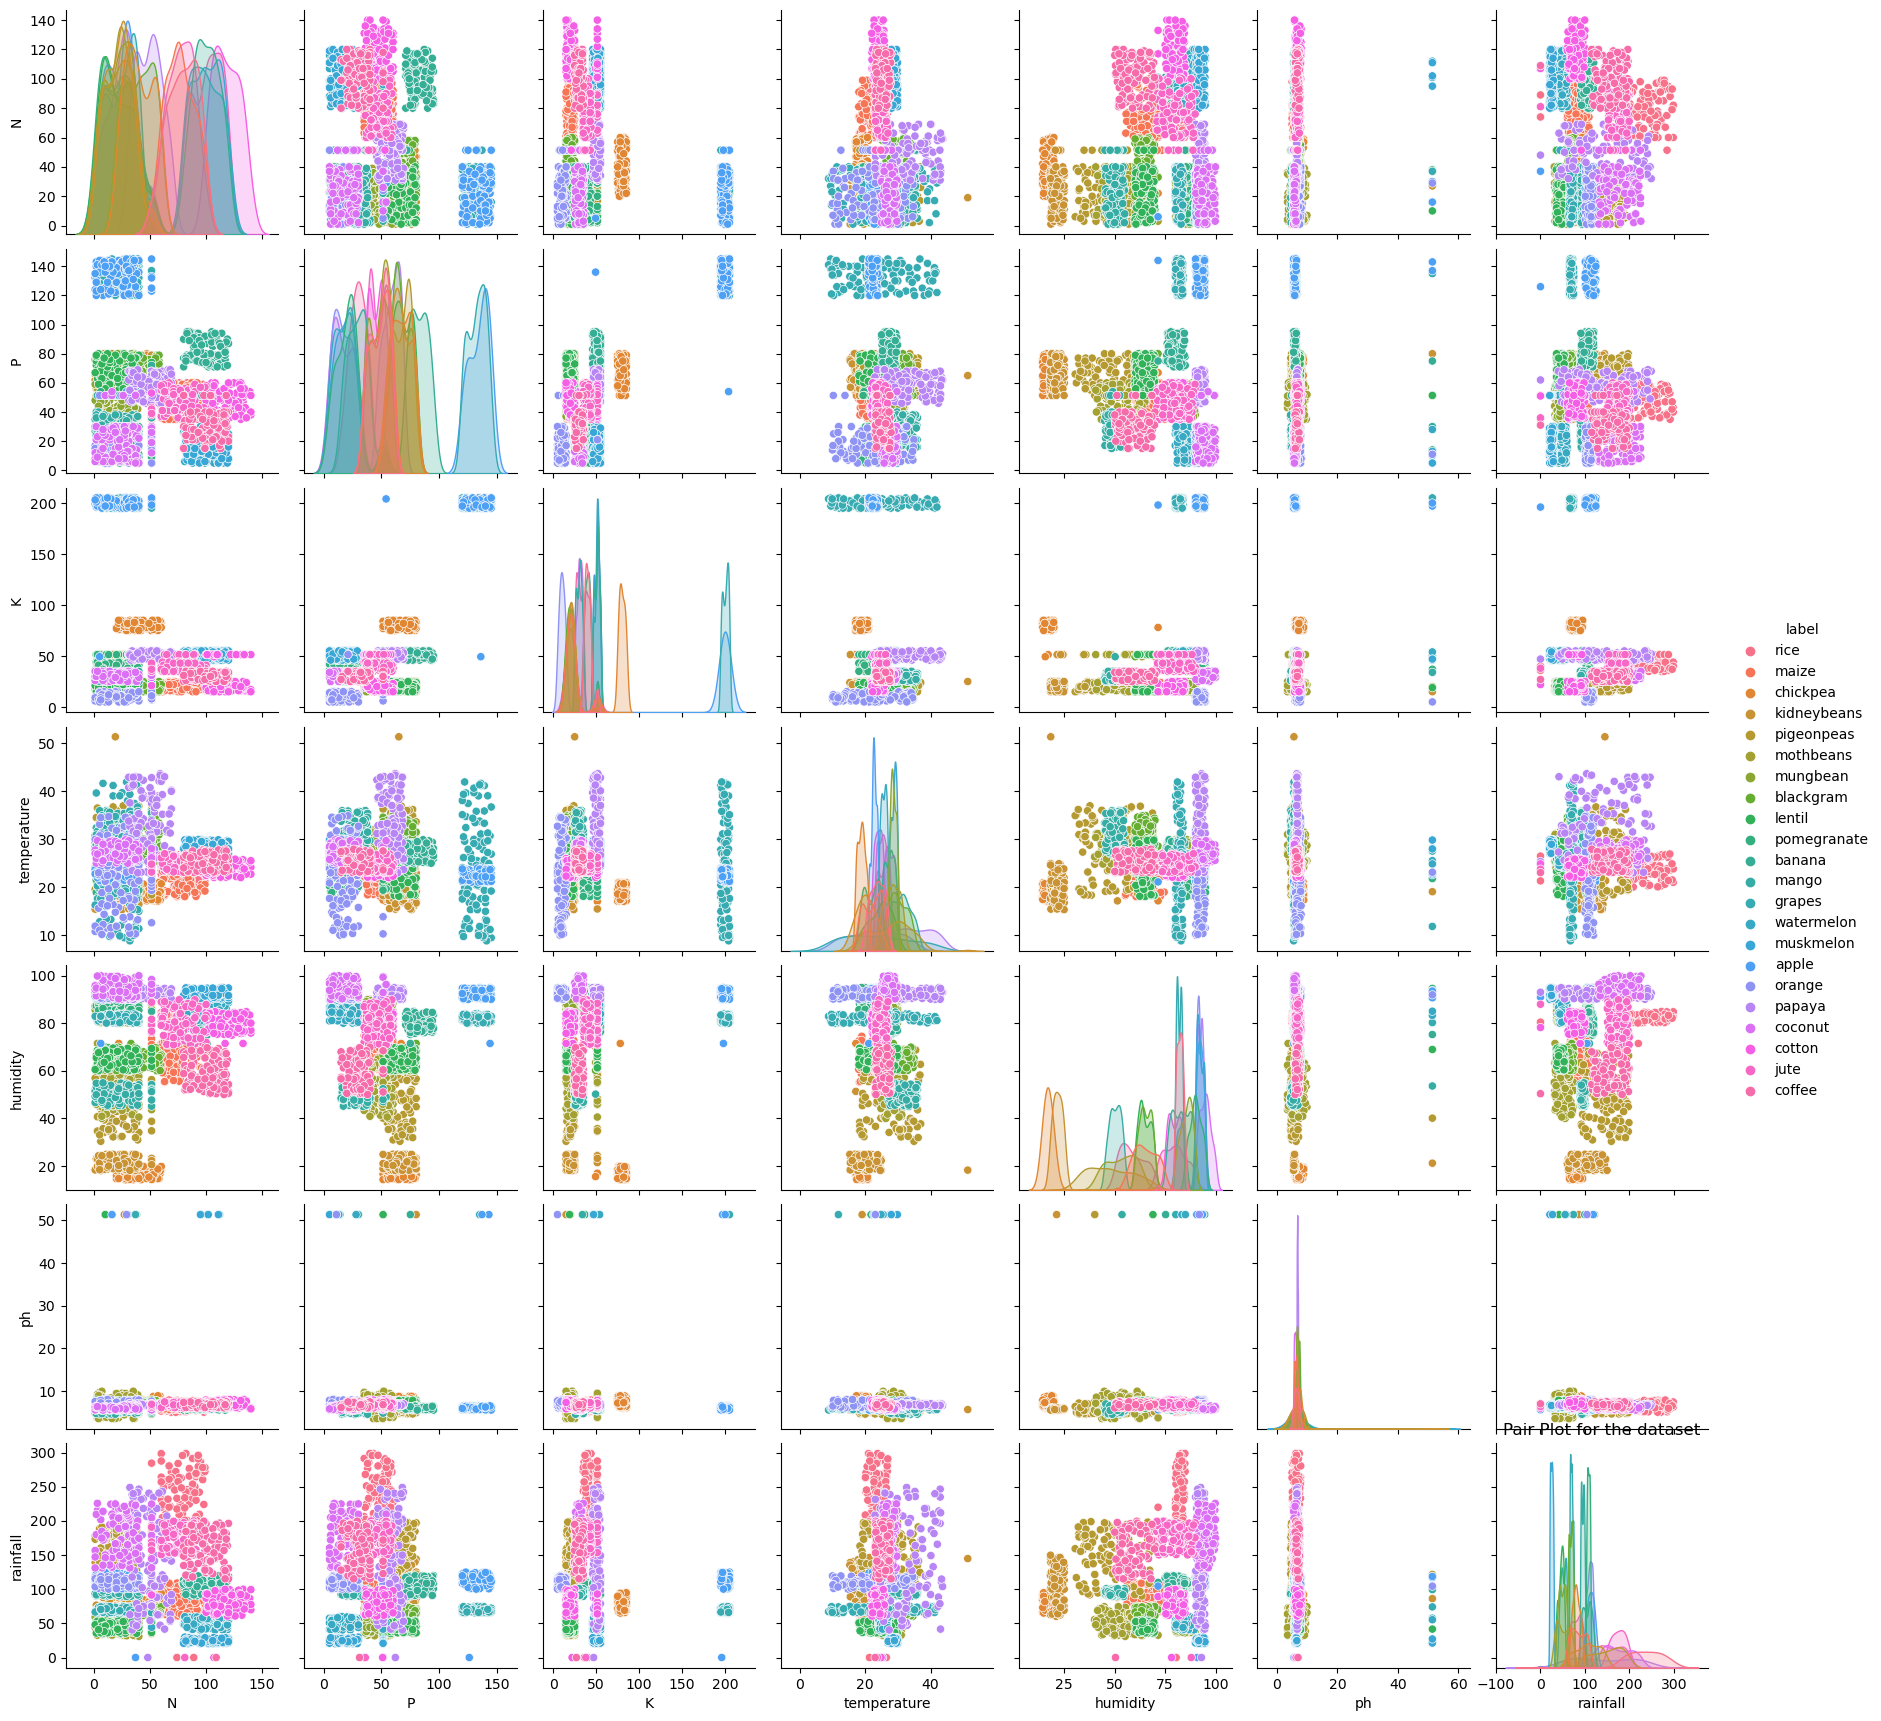

In [56]:
sns.pairplot(data=data,hue='label')
plt.title('Pair Plot for the dataset');

In [58]:
data.duplicated().sum()

0

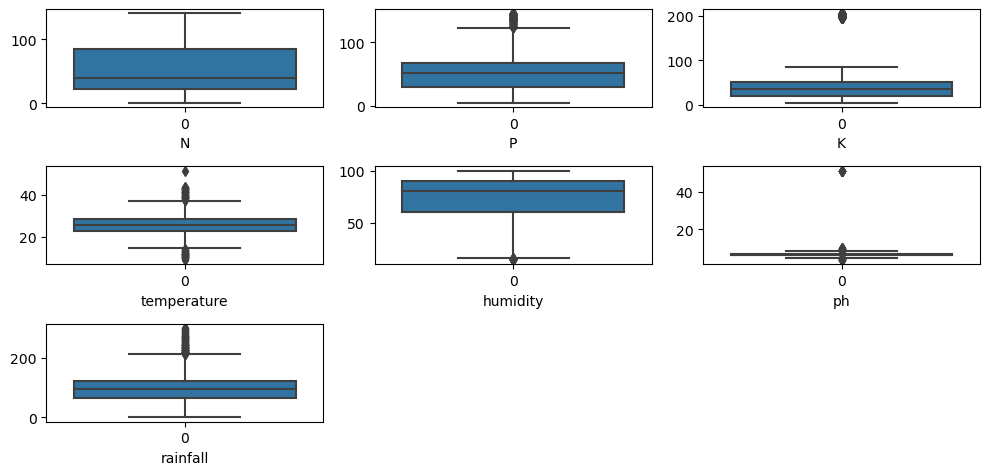

In [60]:
plt.figure(figsize=(10,6))
plotnumber=1

for column in data:
    if plotnumber<=7:
        ax=plt.subplot(4,3, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize=10)

    plotnumber+=1
plt.tight_layout()

In [61]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,51.365267,53.865829,49.450005,25.631366,71.505095,6.776521,102.961693
std,36.165851,32.498748,50.207181,5.090885,22.200091,3.775036,55.109932
min,1.000000,5.000000,5.000000,8.825675,14.258040,3.504752,0.000000
25%,22.000000,30.000000,21.000000,22.770662,60.275383,5.977138,64.236408
50%,39.000000,51.365267,35.000000,25.600938,80.454379,6.430151,94.651497
75%,84.000000,67.000000,51.365267,28.563593,89.935185,6.932434,123.026982
max,140.000000,145.000000,205.000000,51.365267,99.981876,51.365267,298.560117


## Construction and Evaluation of Models

In [65]:
Lc=LabelEncoder()
data.label=Lc.fit_transform(data['label'])

In [68]:
Crop_Mappings = dict(zip(Lc.classes_, Lc.transform(Lc.classes_)))
print('Crop_Mappings: \n', Crop_Mappings, sep='')

Crop_Mappings: 
 {'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


In [67]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.000000,20.879744,82.002744,6.502985,202.935536,20
1,85.0,58.0,41.000000,21.770462,80.319644,7.038096,226.655537,20
2,60.0,55.0,49.318848,23.004459,82.320763,7.840207,263.964248,20
3,74.0,35.0,40.000000,26.491096,80.158363,6.980401,0.000000,20
4,78.0,42.0,42.000000,20.130175,81.604873,7.628473,262.717340,20


In [70]:
tc = data.corr()
tc

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.239158,-0.141047,0.024073,0.193001,0.031104,0.052186,-0.031884
P,-0.239158,1.000000,0.741041,-0.123182,-0.108420,-0.029955,-0.064292,-0.484275
K,-0.141047,0.741041,1.000000,-0.160480,0.185250,-0.004019,-0.062278,-0.344220
temperature,0.024073,-0.123182,-0.160480,1.000000,0.195213,-0.027547,-0.024984,0.112297
humidity,0.193001,-0.108420,0.185250,0.195213,1.000000,0.018345,0.089461,0.193556
ph,0.031104,-0.029955,-0.004019,-0.027547,0.018345,1.000000,-0.059339,0.015155
rainfall,0.052186,-0.064292,-0.062278,-0.024984,0.089461,-0.059339,1.000000,0.042314
label,-0.031884,-0.484275,-0.344220,0.112297,0.193556,0.015155,0.042314,1.000000


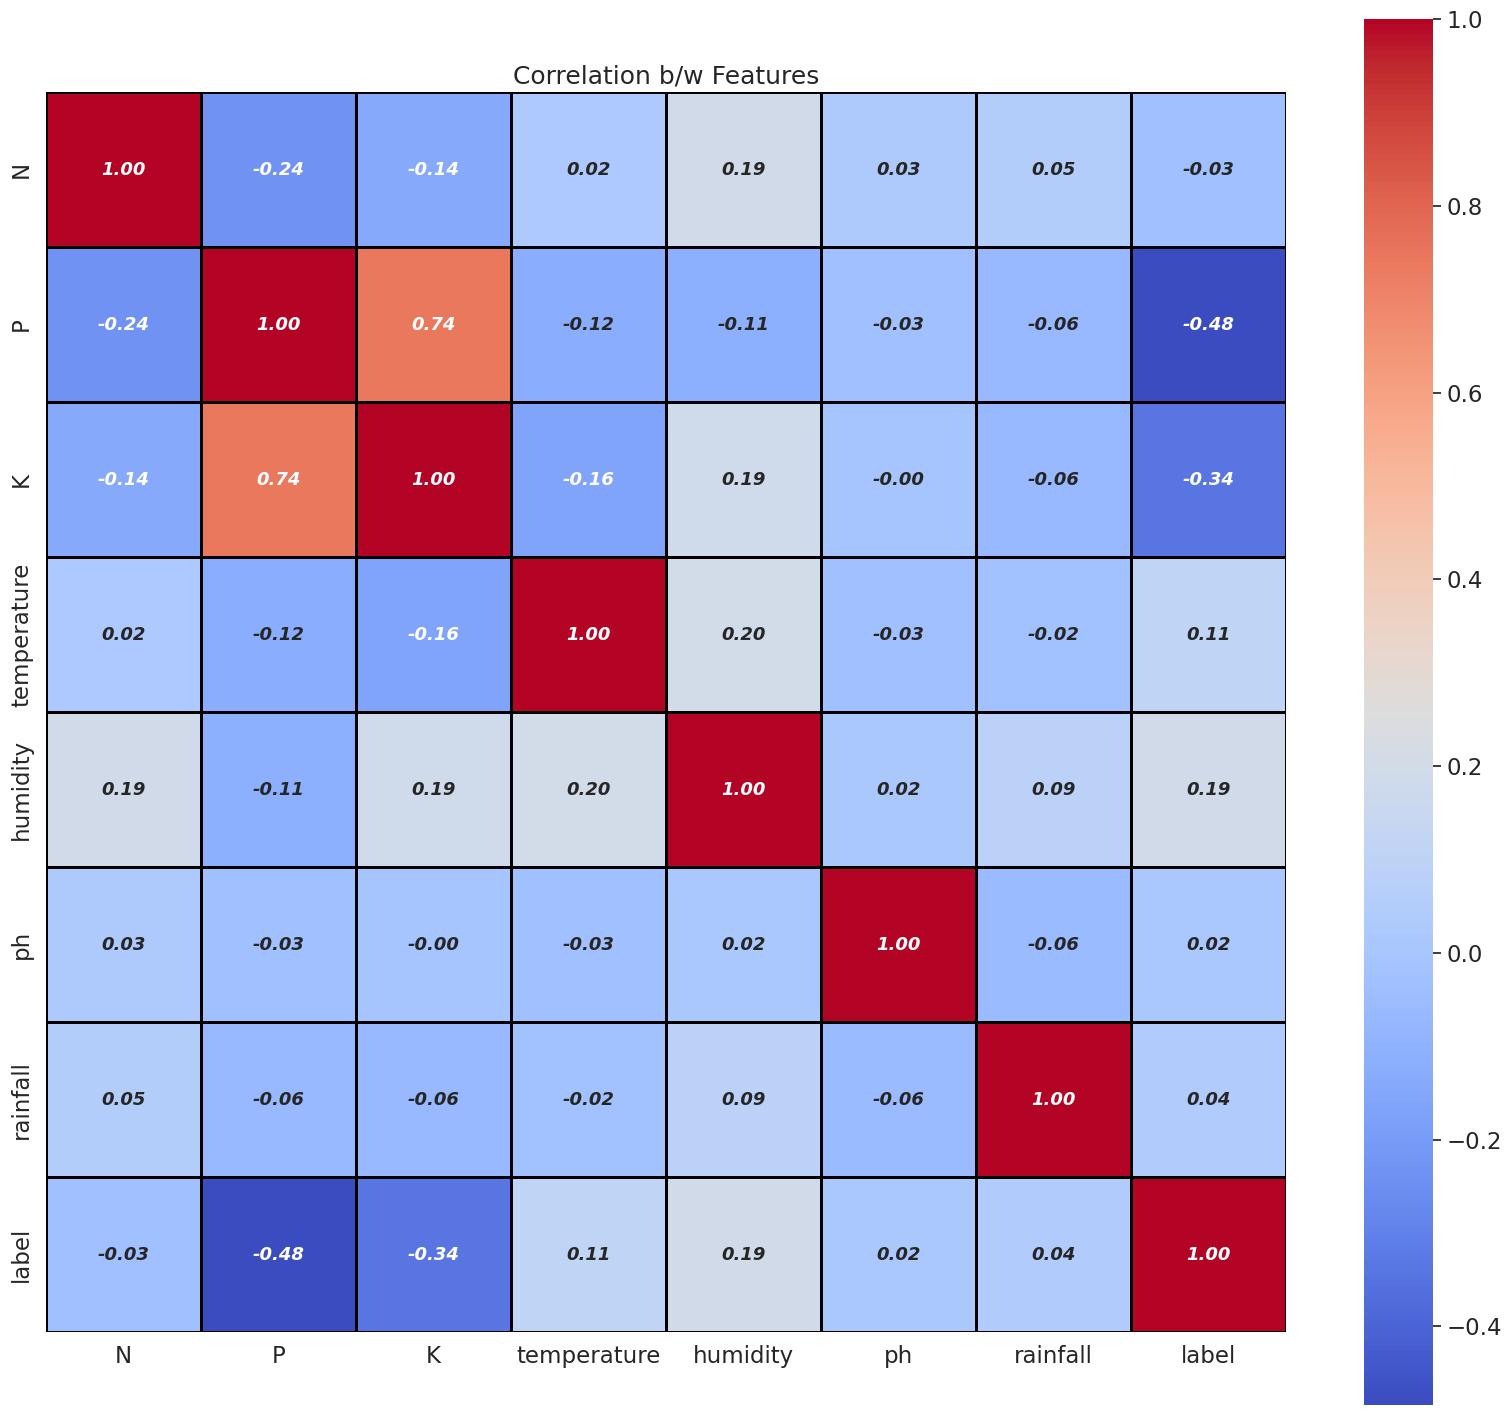

In [121]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,18))
sns.heatmap(tc, annot=True, square = True, fmt= '.2f',cmap= 'coolwarm',
            linewidths=1, annot_kws={'fontsize': 13, 'fontstyle':'italic', 'fontweight':'bold'},
            linecolor='black') 
# annot_kws is used to change the text properties, typically the font size ,
# fmt(format) means adding text to each on each cell and .2f is used for placement of 2 digits after decimal
plt.title('Correlation b/w Features')
plt.show()

In [73]:
y=data['label']
print(y)
x= data.drop('label', axis=1)
x

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32


,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42.000000,43.000000,20.879744,82.002744,6.502985,202.935536
1,85.0,58.000000,41.000000,21.770462,80.319644,7.038096,226.655537
2,60.0,55.000000,49.318848,23.004459,82.320763,7.840207,263.964248
3,74.0,35.000000,40.000000,26.491096,80.158363,6.980401,0.000000
4,78.0,42.000000,42.000000,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107.0,34.000000,32.000000,26.774637,66.413269,6.780064,177.774507
2196,99.0,15.000000,27.000000,27.417112,56.636362,6.086922,127.924610
2197,118.0,33.000000,30.000000,24.131797,67.225123,6.362608,173.322839
2198,117.0,32.000000,34.000000,26.272418,52.127394,6.758793,127.175293


In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)

### Logistic Regression

In [75]:
Log_Reg = LogisticRegression()
Log_Reg.fit(x_train, y_train)

LogisticRegression()

In [76]:
y_pred_LR = Log_Reg.predict(x_test)
y_pred_LR[:10]

array([20,  3, 17, 14,  3, 18,  2, 21,  5,  2])

In [77]:
Log_Reg_Test_Accuracy = accuracy_score(y_test, y_pred_LR)
print ('Log Reg Test Accuracy:', Log_Reg_Test_Accuracy)

Log_Reg_Test_F1 = f1_score(y_test, y_pred_LR, average = 'weighted')
print ('Log Reg Test F1 score:', Log_Reg_Test_F1)

Log_Reg_Test_Precision = precision_score(y_test, y_pred_LR, average = 'weighted')
print ('Log Reg Test Precision score:', Log_Reg_Test_Precision)

Log_Reg_Test_Recall = recall_score(y_test, y_pred_LR, average = 'weighted')
print ('Log Reg Test Recall score:', Log_Reg_Test_Recall)

Log Reg Test Accuracy: 0.9068181818181819
Log Reg Test F1 score: 0.9049672085426695
Log Reg Test Precision score: 0.9055376103451828
Log Reg Test Recall score: 0.9068181818181819


In [82]:
Log_Reg_cm = confusion_matrix(y_test, y_pred_LR)
print(Log_Reg_cm)

[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  1  2  0  3  0  0  0  0  0  0  0  0]
 [ 1  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 16  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  1  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 20  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  1  1  0  0  0  0 18  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  1  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  2  9  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [135]:
report = classification_report(y_test, y_pred_LR)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.86      1.00      0.92        18
           2       0.70      0.67      0.68        21
           3       0.97      0.97      0.97        29
           4       1.00      1.00      1.00        20
           5       0.91      0.95      0.93        21
           6       0.94      0.94      0.94        16
           7       1.00      1.00      1.00        24
           8       0.85      0.77      0.81        22
           9       1.00      0.93      0.97        15
          10       0.90      0.82      0.86        22
          11       0.86      0.75      0.80        24
          12       0.86      0.95      0.90        20
          13       0.56      0.53      0.55        17
          14       0.93      0.93      0.93        15
          15       0.94      1.00      0.97        17
          16       1.00      1.00      1.00        16
          17       0.85    

In [81]:
y_train_pred_LR = Log_Reg.predict(x_train)
y_train_pred_LR[:10]

array([18, 15,  6, 21,  5,  9,  9,  2,  5, 12])

In [83]:
Log_Reg_Train_Accuracy = accuracy_score(y_train, y_train_pred_LR)
print ('Log Reg Train Accuracy:', Log_Reg_Train_Accuracy)

Log_Reg_Train_F1 = f1_score(y_train, y_train_pred_LR, average = 'weighted')
print ('Log Reg Train F1 score:', Log_Reg_Train_F1)

Log_Reg_Train_Precision = precision_score(y_train, y_train_pred_LR, average = 'weighted')
print ('Log Reg Train Precision score:', Log_Reg_Train_Precision)

Log_Reg_Train_Recall = recall_score(y_train, y_train_pred_LR, average = 'weighted')
print ('Log Reg Train Recall score:', Log_Reg_Train_Recall)

Log Reg Train Accuracy: 0.9306818181818182
Log Reg Train F1 score: 0.930597235239326
Log Reg Train Precision score: 0.9313165828041764
Log Reg Train Recall score: 0.9306818181818182


### SVM Classifier

In [84]:
SVM_class = SVC(C=12.0, kernel = 'poly', gamma='scale')
SVM_class.fit(x_train, y_train)

SVC(C=12.0, kernel='poly')

In [85]:
y_pred_SVM = SVM_class.predict(x_test)
y_pred_SVM[:10]

array([ 8,  9, 17, 14,  3, 18, 13, 21,  5, 13])

In [86]:
SVM_Test_Accuracy = accuracy_score(y_test, y_pred_SVM )
print ('SVM Test Accuracy:', SVM_Test_Accuracy)

SVM_Test_F1 = f1_score(y_test, y_pred_SVM, average = 'weighted')
print ('SVM Test F1 score:', SVM_Test_F1)

SVM_Test_Precision = precision_score(y_test, y_pred_SVM, average = 'weighted')
print ('SVM Test Precision score:', SVM_Test_Precision)

SVM_Test_Recall = recall_score(y_test, y_pred_SVM, average = 'weighted')
print ('SVM Test Recall score:', SVM_Test_Recall)

SVM Test Accuracy: 0.975
SVM Test F1 score: 0.974896902795958
SVM Test Precision score: 0.9755632411067193
SVM Test Recall score: 0.975


In [87]:
SVM_cm = confusion_matrix(y_test, y_pred_SVM)
print(SVM_cm)

[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 17  0  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [88]:
report = classification_report(y_test, y_pred_SVM)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        18
           2       0.91      1.00      0.95        21
           3       1.00      0.97      0.98        29
           4       1.00      1.00      1.00        20
           5       0.91      1.00      0.95        21
           6       1.00      0.94      0.97        16
           7       1.00      1.00      1.00        24
           8       0.85      0.77      0.81        22
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        22
          11       1.00      0.96      0.98        24
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        16
          17       1.00    

### Decision Tree Classifier

In [89]:
DT = DecisionTreeClassifier(criterion='gini', min_samples_split=2,
    min_samples_leaf=1, random_state=2, splitter='random')
DT.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2, splitter='random')

In [90]:
y_pred_DT = DT.predict(x_test)
y_pred_DT[:10]

array([ 8,  9, 17, 14,  3, 18, 13, 21,  5, 13])

In [91]:
DT_Test_Accuracy = accuracy_score(y_test, y_pred_DT)
print ('DT Test Accuracy:', DT_Test_Accuracy)

DT_Test_F1 = f1_score(y_test, y_pred_DT, average = 'weighted')
print ('DT Test F1 score:', DT_Test_F1)

DT_Test_Precision = precision_score(y_test, y_pred_DT, average = 'weighted')
print ('DT Test Precision score:', DT_Test_Precision)

DT_Test_Recall = recall_score(y_test, y_pred_DT, average = 'weighted')
print ('DT Test Recall score:', DT_Test_Recall)

DT Test Accuracy: 0.9363636363636364
DT Test F1 score: 0.9353962094825132
DT Test Precision score: 0.9380966714906802
DT Test Recall score: 0.9363636363636364


In [92]:
DT_report = classification_report(y_test, y_pred_DT)
print(DT_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.95      1.00      0.97        18
           2       0.88      1.00      0.93        21
           3       1.00      1.00      1.00        29
           4       0.87      1.00      0.93        20
           5       0.95      0.95      0.95        21
           6       0.89      1.00      0.94        16
           7       1.00      1.00      1.00        24
           8       0.95      0.91      0.93        22
           9       1.00      1.00      1.00        15
          10       0.82      0.82      0.82        22
          11       0.91      0.83      0.87        24
          12       1.00      1.00      1.00        20
          13       0.79      0.88      0.83        17
          14       0.87      0.87      0.87        15
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        16
          17       0.94    

In [94]:
DT_cm = confusion_matrix(y_test, y_pred_DT)
print(DT_cm)

[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0 18  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  0  0  0 20  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0 15  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0

In [95]:
y_train_pred_DT = DT.predict(x_train)
y_train_pred_DT[:10]

array([18, 15,  6, 21,  5,  9,  9,  2,  5, 12])

In [96]:
DT_Train_Accuracy = accuracy_score(y_train, y_train_pred_DT)
print ('DT Train Accuracy:', DT_Train_Accuracy)

DT_Train_F1 = f1_score(y_train, y_train_pred_DT, average = 'weighted')
print ('DT Train F1 score:', DT_Train_F1)

DT_Train_Precision = precision_score(y_train, y_train_pred_DT, average = 'weighted')
print ('DT Train Precision score:', DT_Train_Precision)

DT_Train_Recall = recall_score(y_train, y_train_pred_DT, average = 'weighted')
print ('DT Train Recall score:', DT_Train_Recall)

DT Train Accuracy: 1.0
DT Train F1 score: 1.0
DT Train Precision score: 1.0
DT Train Recall score: 1.0


### Random Forest Classifier

In [97]:
RF_classifier = RandomForestClassifier(n_estimators = 900, criterion = 'gini', random_state = 0)
RF_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=900, random_state=0)

In [98]:
y_pred_RF = RF_classifier.predict(x_test)
y_pred_RF[:10]

array([ 8,  9, 17, 14,  3, 18, 13, 21,  5, 13])

In [99]:
RF_Test_Accuracy = accuracy_score(y_test, y_pred_RF)
print ('RF Test Accuracy:', RF_Test_Accuracy)

RF_Test_F1 = f1_score(y_test, y_pred_RF, average = 'weighted')
print ('RF Test F1 score:', RF_Test_F1)

RF_Test_Precision = precision_score(y_test, y_pred_RF, average = 'weighted')
print ('RF Test Precision score:', RF_Test_Precision)

RF_Test_Recall = recall_score(y_test, y_pred_RF, average = 'weighted')
print ('RF Test Recall score:', RF_Test_Recall)

RF Test Accuracy: 0.9886363636363636
RF Test F1 score: 0.9886199836199836
RF Test Precision score: 0.9887077294685991
RF Test Recall score: 0.9886363636363636


In [100]:
RF_cm = confusion_matrix(y_test, y_pred_RF)
print(RF_cm)

[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [101]:
RF_report = classification_report(y_test, y_pred_RF)
print(RF_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        21
           6       0.94      0.94      0.94        16
           7       1.00      1.00      1.00        24
           8       0.91      0.95      0.93        22
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        22
          11       0.96      0.96      0.96        24
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        16
          17       1.00    

In [102]:
y_train_pred_RF = RF_classifier.predict(x_train)
y_train_pred_RF[:10]

array([18, 15,  6, 21,  5,  9,  9,  2,  5, 12])

In [103]:
RF_Train_Accuracy = accuracy_score(y_train, y_train_pred_RF)
print ('RF Train Accuracy:', RF_Train_Accuracy)

RF_Train_F1 = f1_score(y_train, y_train_pred_RF, average = 'weighted')
print ('RF Train F1 score:', RF_Train_F1)

RF_Train_Precision = precision_score(y_train, y_train_pred_RF, average = 'weighted')
print ('RF Train Precision score:', RF_Train_Precision)

RF_Train_Recall = recall_score(y_train, y_train_pred_RF, average = 'weighted')
print ('RF Train Recall score:', RF_Train_Recall)

RF Train Accuracy: 1.0
RF Train F1 score: 1.0
RF Train Precision score: 1.0
RF Train Recall score: 1.0


### Gradient Boosting Classifier

In [104]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)

GradientBoostingClassifier()

In [105]:
y_pred_GBC = GBC.predict(x_test)
y_pred_GBC[:10]

array([20,  9, 17, 14, 13, 18, 13, 21,  5, 13])

In [106]:
GBC_Test_Accuracy = accuracy_score(y_test, y_pred_GBC)
print ('GBC Test Accuracy:', GBC_Test_Accuracy)

GBC_Test_F1 = f1_score(y_test, y_pred_GBC, average = 'weighted')
print ('GBC Test F1 score:', GBC_Test_F1)

GBC_Test_Precision = precision_score(y_test, y_pred_GBC, average = 'weighted')
print ('GBC Test Precision score:', GBC_Test_Precision)

GBC_Test_Recall = recall_score(y_test, y_pred_GBC, average = 'weighted')
print ('GBC Test Recall score:', GBC_Test_Recall)

GBC Test Accuracy: 0.9727272727272728
GBC Test F1 score: 0.9728958660036321
GBC Test Precision score: 0.9740400717703349
GBC Test Recall score: 0.9727272727272728


In [107]:
GBC_cm = confusion_matrix(y_test, y_pred_GBC)
print(GBC_cm)

[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [108]:
GBC_report = classification_report(y_test, y_pred_GBC)
print(GBC_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.95      1.00      0.97        18
           2       0.88      1.00      0.93        21
           3       1.00      0.93      0.96        29
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        21
           6       1.00      0.94      0.97        16
           7       1.00      1.00      1.00        24
           8       0.86      0.86      0.86        22
           9       0.94      1.00      0.97        15
          10       1.00      0.95      0.98        22
          11       1.00      0.96      0.98        24
          12       1.00      1.00      1.00        20
          13       0.94      0.88      0.91        17
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        16
          17       1.00    

In [109]:
y_train_pred_GBC = GBC.predict(x_train)
y_train_pred_GBC[:10]

array([18, 15,  6, 21,  5,  9,  9,  2,  5, 12])

In [169]:
GBC_Train_Accuracy = accuracy_score(y_train, y_train_pred_GBC)
print ('GBC Train Accuracy:', GBC_Train_Accuracy)

GBC_Train_F1 = f1_score(y_train, y_train_pred_GBC, average = 'weighted')
print ('GBC Train F1 score:', GBC_Train_F1)

GBC_Train_Precision = precision_score(y_train, y_train_pred_GBC, average = 'weighted')
print ('GBC Train Precision score:', GBC_Train_Precision)

GBC_Train_Recall = recall_score(y_train, y_train_pred_GBC, average = 'weighted')
print ('GBC Train Recall score:', GBC_Train_Recall)

GBC Train Accuracy: 1.0
GBC Train F1 score: 1.0
GBC Train Precision score: 1.0
GBC Train Recall score: 1.0


### XGBoost Classifier

In [110]:
xg = XGBClassifier( n_estimators=120, max_depth=5, n_jobs=-1,random_state=5)
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [111]:
y_pred_xg = xg.predict(x_test)
y_pred_xg[:10]

array([20,  9, 17, 14,  3, 18, 13, 21,  5, 13], dtype=int64)

In [112]:
Xg_Test_Accuracy = accuracy_score(y_test, y_pred_xg)
print ('Xg Test Accuracy:', Xg_Test_Accuracy)

Xg_Test_F1 = f1_score(y_test, y_pred_xg, average = 'weighted')
print ('Xg Test F1 score:', Xg_Test_F1)

Xg_Test_Precision = precision_score(y_test, y_pred_xg, average = 'weighted')
print ('Xg Test Precision score:', Xg_Test_Precision)

Xg_Test_Recall = recall_score(y_test, y_pred_xg, average = 'weighted')
print ('Xg Test Recall score:', Xg_Test_Recall)

Xg Test Accuracy: 0.9818181818181818
Xg Test F1 score: 0.981785522754949
Xg Test Precision score: 0.9822858864620229
Xg Test Recall score: 0.9818181818181818


In [113]:
xg_cm = confusion_matrix(y_test, y_pred_xg)
print(xg_cm)

[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0 22  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [114]:
xg_report = classification_report(y_test, y_pred_xg)
print(xg_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        18
           2       0.95      1.00      0.98        21
           3       1.00      0.97      0.98        29
           4       1.00      1.00      1.00        20
           5       0.95      1.00      0.98        21
           6       1.00      0.94      0.97        16
           7       1.00      1.00      1.00        24
           8       0.95      0.91      0.93        22
           9       0.94      1.00      0.97        15
          10       1.00      0.95      0.98        22
          11       0.96      0.92      0.94        24
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        16
          17       1.00    

In [115]:
y_train_pred_xg = xg.predict(x_train)
y_train_pred_xg[:10]

array([18, 15,  6, 21,  5,  9,  9,  2,  5, 12], dtype=int64)

In [116]:
#Evaluation for train data
Xg_Train_Accuracy = accuracy_score(y_train, y_train_pred_xg)
print ('Xg Train Accuracy:', Xg_Train_Accuracy)

Xg_Train_F1 = f1_score(y_train, y_train_pred_xg, average = 'weighted')
print ('Xg Train F1 score:', Xg_Train_F1)

Xg_Train_Precision = precision_score(y_train, y_train_pred_xg, average = 'weighted')
print ('Xg Train Precision score:', Xg_Train_Precision)

Xg_Train_Recall = recall_score(y_train, y_train_pred_xg, average = 'weighted')
print ('Xg Train Recall score:', Xg_Train_Recall)

Xg Train Accuracy: 1.0
Xg Train F1 score: 1.0
Xg Train Precision score: 1.0
Xg Train Recall score: 1.0


- Based on the evaluation of results from the various moodels built, we select the Random Forest model as the best model for our case.
- So Lets create a pickle fle and save the model to a local pickle file so as to deploy it later.

In [117]:
pickle_out = open('RF_classifier.pkl', 'wb')
pickle.dump(Crop_Mappings, pickle_out)
pickle.dump(RF_classifier, pickle_out)
pickle_out.close()